In [29]:
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
import arviz as az
import matplotlib.pyplot as plt


In [3]:
np.random.seed(42)
X = np.linspace(0,10,100)
y_true = 2 * X + 1 + np.random.normal(0,2,size=len(X))
y_observed = y_true + np.random.normal(0,2,size=len(X))

In [4]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta',mu=0,sd=10)
    sigma = pm.HalfNormal('sigma',sd=1)
    mu = alpha + beta * X
    y = pm.Normal('y',mu=mu, sd=sigma, observed=y_observed)

In [5]:
with model:
    trace = pm.sample(1000, tune=1000)
    

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 20 seconds.
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


C:\Users\Talha\AppData\Local\Temp\ipykernel_6168\741384726.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-w

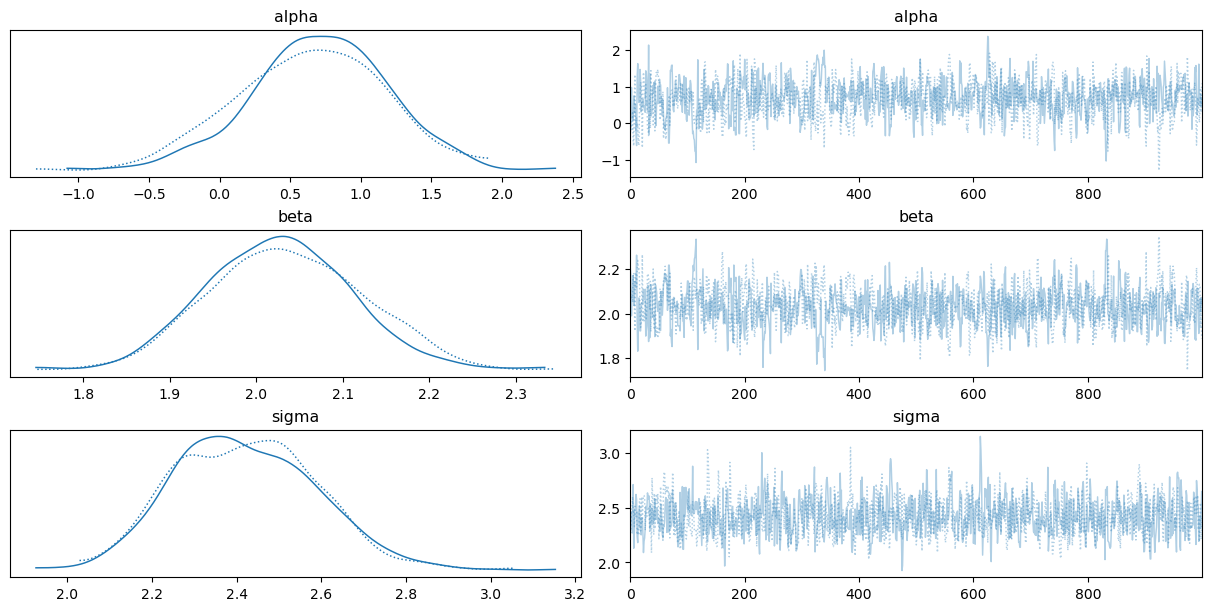

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.67,0.50,-0.35,1.54,0.02,0.01,716.0,764.0,1.0
beta,2.03,0.09,1.88,2.20,0.00,0.00,726.0,881.0,1.0
sigma,2.42,0.17,2.11,2.71,0.00,0.00,1042.0,1067.0,1.0


In [6]:
pm.traceplot(trace)
plt.show()
pm.summary(trace).round(2)

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


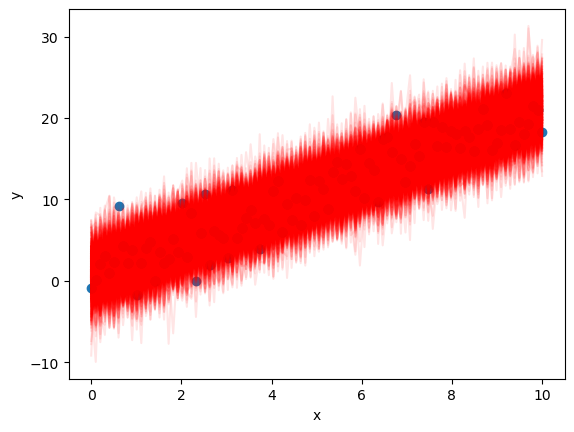

In [7]:
with model:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)

plt.scatter(X, y_observed, label='Observed data')
plt.plot(X, ppc['y'].T , color='red', alpha=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
with pm.Model() as regularized_model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta  = pm.Laplace('beta',mu=0,b=1)
    sigma= pm.HalfNormal('sigma',sd=1)
    mu = alpha + beta * X
    y=pm.Normal('y', mu=mu, sd=sigma, observed=y_observed)
    

with regularized_model:
    regularized_trace = pm.sample(1000, tune=1000)
    

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 23 seconds.


In [34]:
az.compare({"model":trace, "regularized_model":regularized_trace})

C:\Users\Talha\anaconda3\envs\pm3bap\lib\site-packages\arviz\stats\stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(


AttributeError: 'DataFrame' object has no attribute 'append'